In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('used_cars_data.csv')

In [3]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(7253, 14)

In [5]:
df['Power'].head()

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [7]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
df['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998,
       1996])

In [9]:
df.describe()

,S.No.,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,3626.000000,2013.365366,5.869906e+04,5.279722,9.479468
std,2093.905084,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,1813.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3626.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,5439.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,7252.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [11]:
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


In [12]:
df['Mileage'] = df['Mileage'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].median())

df['Engine'] = df['Engine'].astype(str).str.extract(r'(\d+)')[0].astype(float)
df['Engine'] = df['Engine'].fillna(df['Engine'].median())

df['Power'] = df['Power'].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
df['Power'] = df['Power'].fillna(df['Power'].median())

df['Seats'] = df['Seats'].fillna(df['Seats'].median()).astype(int)

# Drop rows with missing values in the target column (price)
df.dropna(subset=['Price'], inplace=True)


In [13]:
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [14]:
df.drop(columns=['S.No.', 'Name', 'New_Price'], inplace=True)

In [15]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6019 non-null   float64
 7   Engine             6019 non-null   float64
 8   Power              6019 non-null   float64
 9   Seats              6019 non-null   int64  
 10  Price              6019 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 564.3+ KB


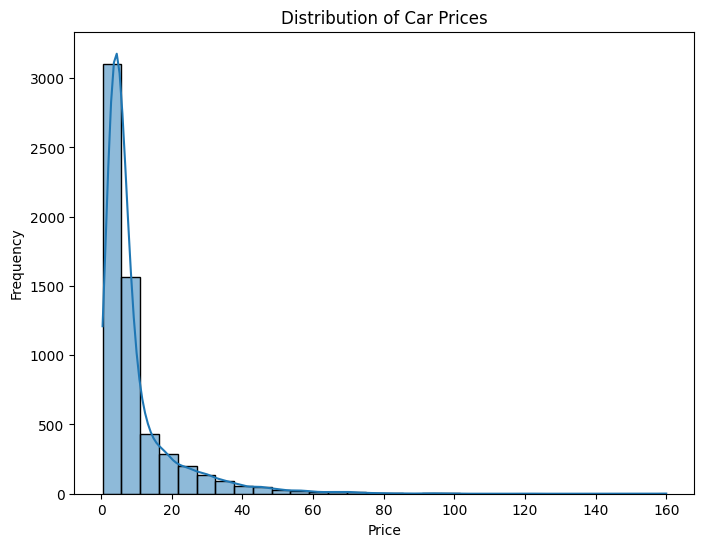

In [17]:
# Plot the distribution of the target variable (Price)
plt.figure(figsize=(8,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

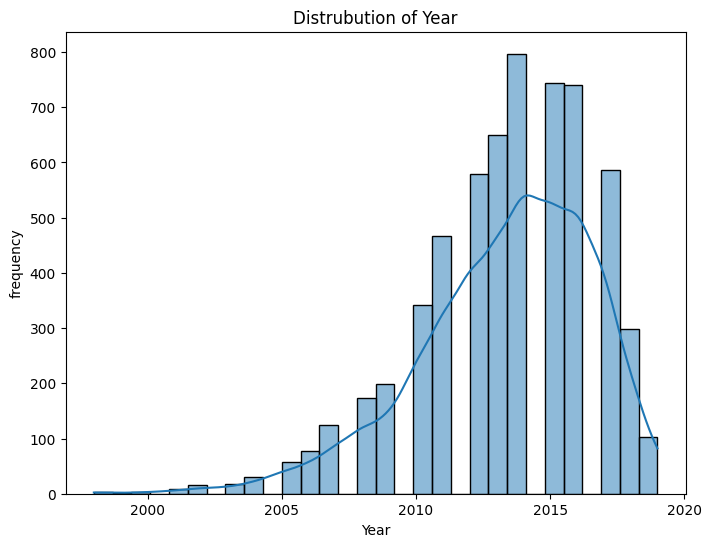

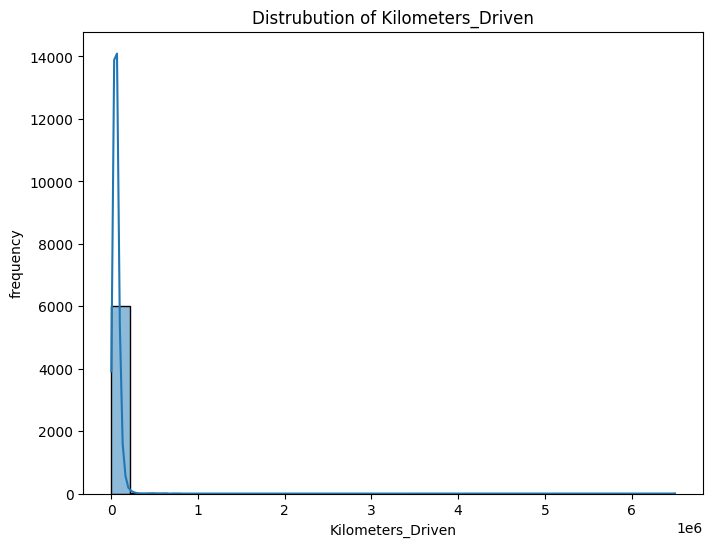

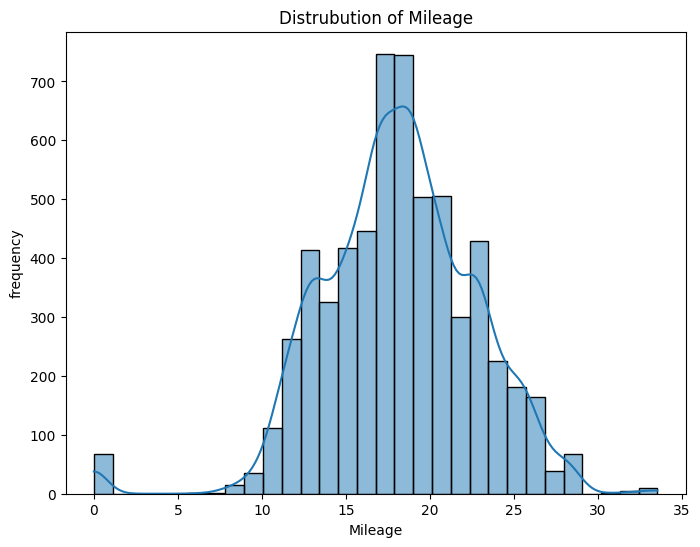

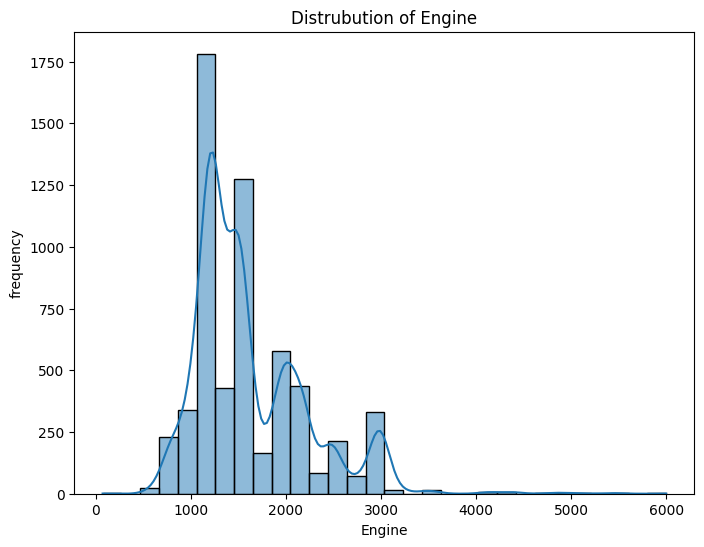

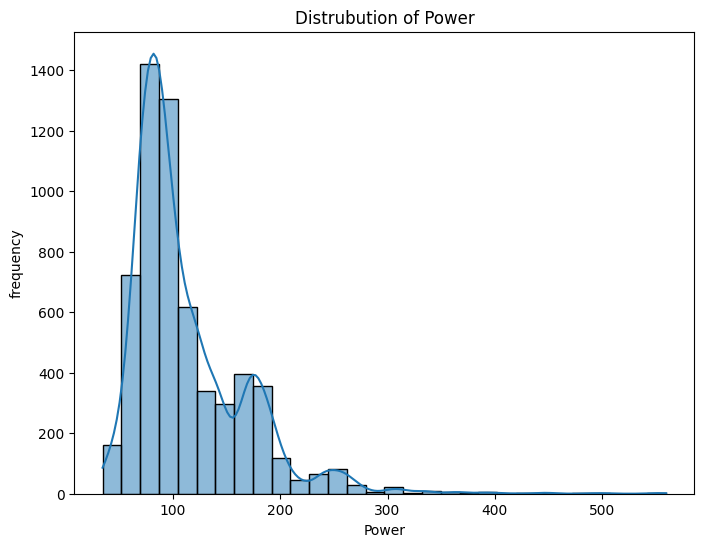

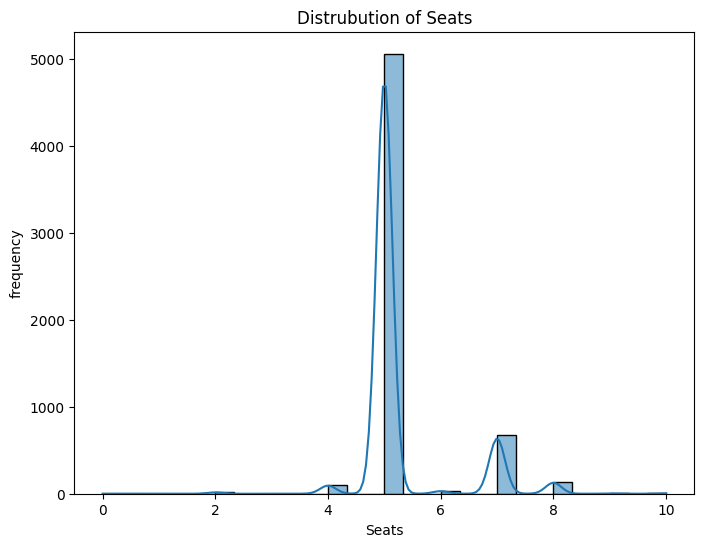

In [18]:
# Plot the distribution of numerical features
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distrubution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

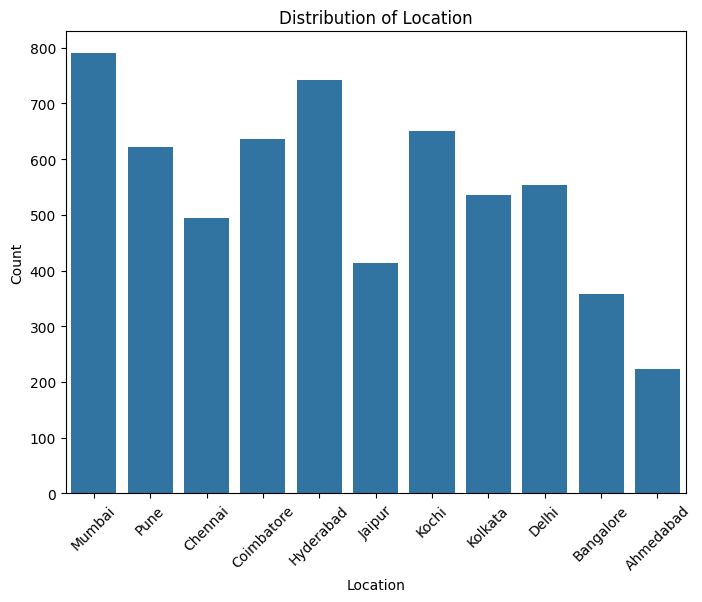

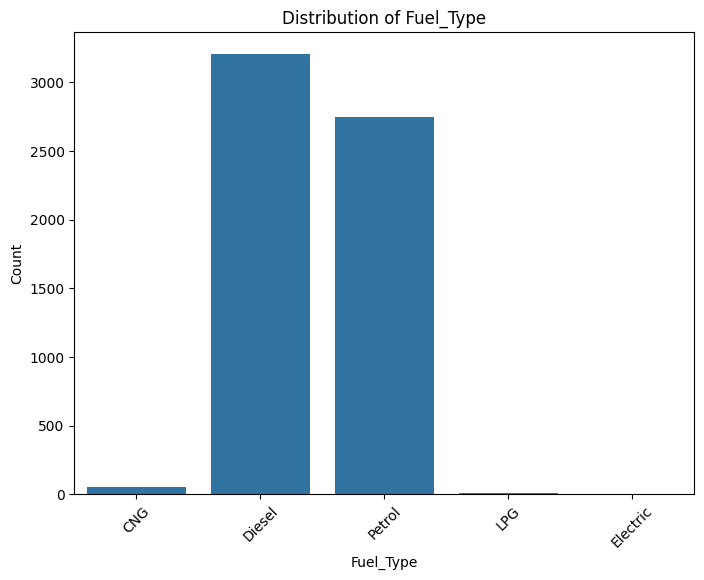

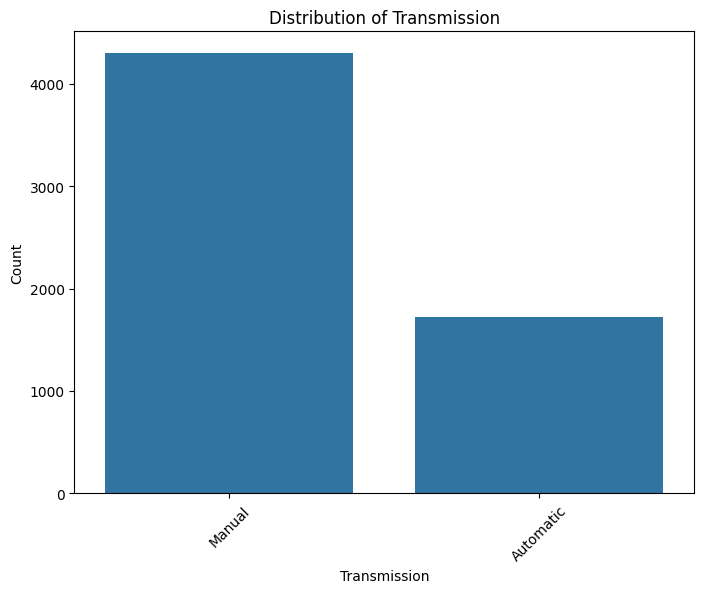

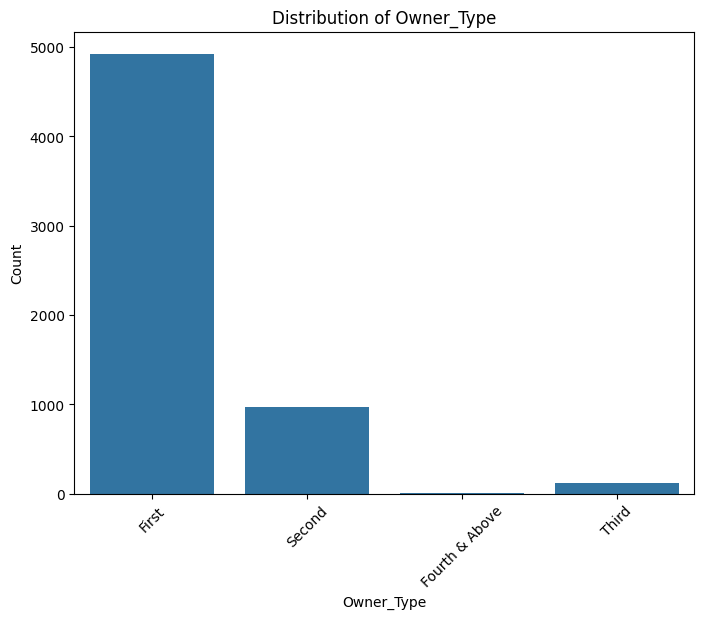

In [19]:
# Plot the distribution of categorical features
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

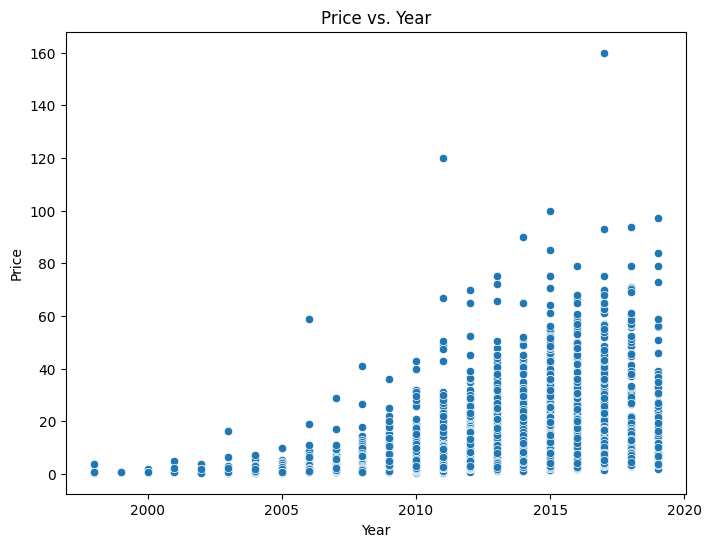

In [20]:
# Plot Price vs. Year
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Year', y='Price')
plt.title('Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

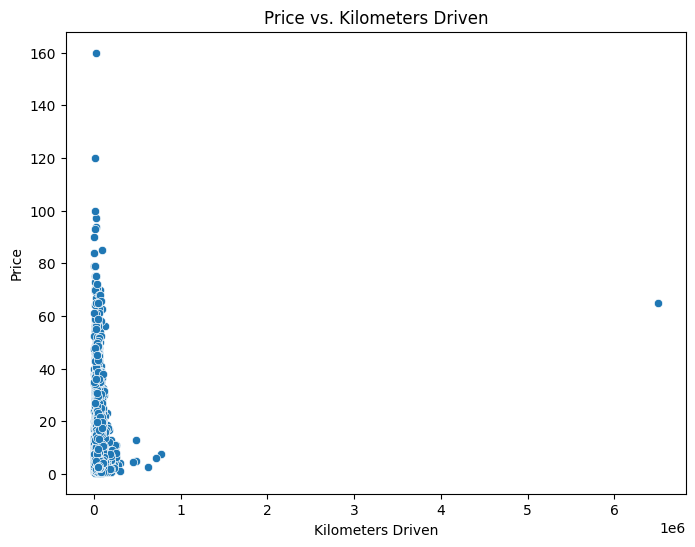

In [21]:
# Plot Price vs. Kilometers_Driven
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Kilometers_Driven', y='Price')
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

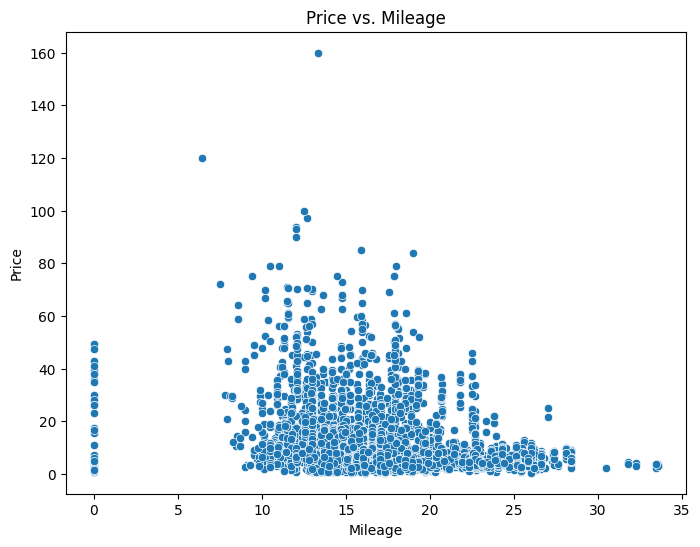

In [22]:
# Plot Price vs. Mileage
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Mileage', y='Price')
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

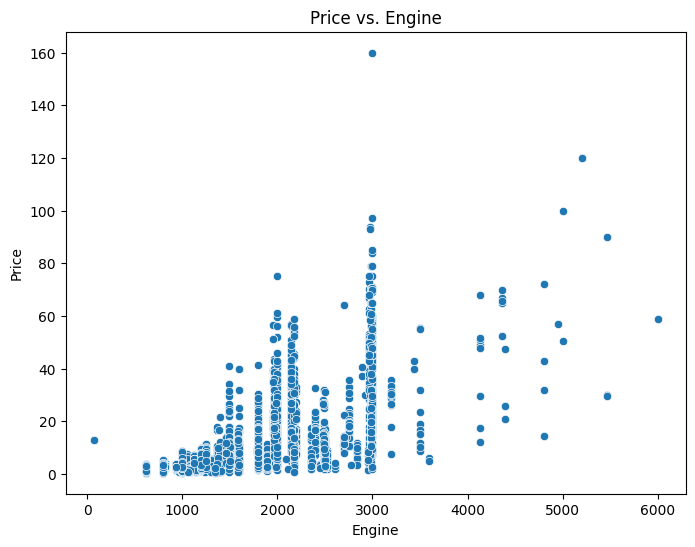

In [23]:
# Plot Price vs. Engine
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Engine', y='Price')
plt.title('Price vs. Engine')
plt.xlabel('Engine')
plt.ylabel('Price')
plt.show()

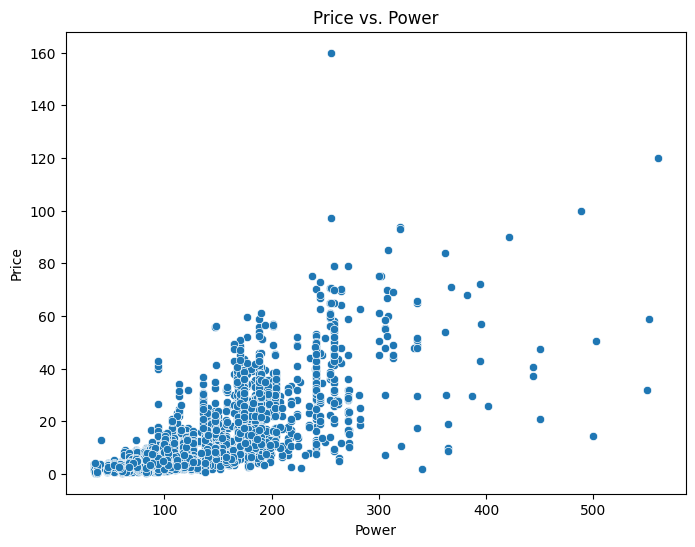

In [24]:
# Plot Price vs. Power
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Power', y='Price')
plt.title('Price vs. Power')
plt.xlabel('Power')
plt.ylabel('Price')
plt.show()

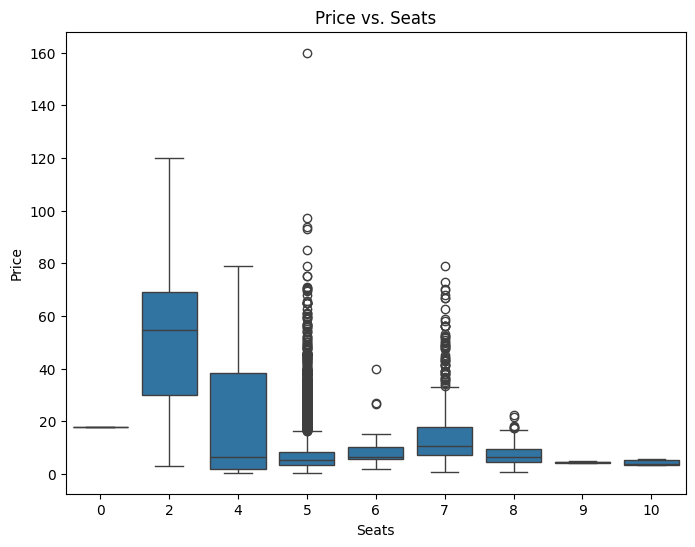

In [25]:
# Plot Price vs. Seats
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Seats', y='Price')
plt.title('Price vs. Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

In [44]:
# Create a new feature: Age of the car
df['Age'] = 2025 - df['Year']

# Create a new feature: Mileage bins
df['Mileage_Bin'] = pd.cut(df['Mileage'], bins=[0,15,20,25,30, np.inf],
labels=['0-15', '15-20', '20-25', '25-30', '30+'], include_lowest=True)

df['Mileage_Bin'] = df['Mileage_Bin'].cat.add_categories('Unknown')

df['Mileage_Bin'] = df['Mileage_Bin'].fillna('Unknown')
df['Mileage_Bin'].isnull().sum()


np.int64(0)

In [65]:
df.dtypes

Year                           int64
Kilometers_Driven              int64
Mileage                      float64
Engine                       float64
Power                        float64
Seats                          int64
Price                        float64
Age                            int64
Location_Bangalore              bool
Location_Chennai                bool
Location_Coimbatore             bool
Location_Delhi                  bool
Location_Hyderabad              bool
Location_Jaipur                 bool
Location_Kochi                  bool
Location_Kolkata                bool
Location_Mumbai                 bool
Location_Pune                   bool
Fuel_Type_Diesel                bool
Fuel_Type_Electric              bool
Fuel_Type_LPG                   bool
Fuel_Type_Petrol                bool
Transmission_Manual             bool
Owner_Type_Fourth & Above       bool
Owner_Type_Second               bool
Owner_Type_Third                bool
Mileage_Bin_15-20               bool
M

In [68]:
df.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Age', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Owner_Type_Fourth & Above', 'Owner_Type_Second',
       'Owner_Type_Third', 'Mileage_Bin_15-20', 'Mileage_Bin_20-25',
       'Mileage_Bin_25-30', 'Mileage_Bin_30+', 'Mileage_Bin_Unknown'],
      dtype='object')

In [70]:
df = df.astype(int)

In [84]:
df.isnull().sum()

Year                         0
Kilometers_Driven            0
Mileage                      0
Engine                       0
Power                        0
Seats                        0
Price                        0
Age                          0
Location_Bangalore           0
Location_Chennai             0
Location_Coimbatore          0
Location_Delhi               0
Location_Hyderabad           0
Location_Jaipur              0
Location_Kochi               0
Location_Kolkata             0
Location_Mumbai              0
Location_Pune                0
Fuel_Type_Diesel             0
Fuel_Type_Electric           0
Fuel_Type_LPG                0
Fuel_Type_Petrol             0
Transmission_Manual          0
Owner_Type_Fourth & Above    0
Owner_Type_Second            0
Owner_Type_Third             0
Mileage_Bin_15-20            0
Mileage_Bin_20-25            0
Mileage_Bin_25-30            0
Mileage_Bin_30+              0
Mileage_Bin_Unknown          0
dtype: int64

In [73]:
# Save the cleaned dataset to a new CSV file 
df.to_csv('cleaned_used_cars', index=False)

In [74]:
X = df.drop(columns=['Price'])
y = df['Price']

# Shape of X and y
print('Feature shape:', X.shape)
print('Target shape:', y.shape)

Feature shape: (6019, 30)
Target shape: (6019,)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4815, 30) (4815,)
Testing set shape: (1204, 30) (1204,)


In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("R-squared (R2):", r2_score(y_test, y_pred_lr))

Linear Regression Results:
Mean Absolute Error (MAE): 3.99394612518177
R-squared (R2): 0.3851197785188599


In [86]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error, r2_score

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R2:", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE: 1.7245995293466225
R2: 0.8679498662795486


In [88]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 0.8/124.9 MB 1.3 MB/s eta 0:01:36
   ---------------------------------------- 1.0/124.9 MB 1.2 MB/s eta 0:01:48
   ---------------------------------------- 1.3/124.9 MB 1.2 MB/s eta 0:01:40
    --------------------------------------- 1.6/124.9 MB 1.1 MB/s eta 0:01:49
    --------------------------------------- 1.8/124.9 MB 1.2 MB/s eta 0:01:46
    --------------------------------------- 2.1/124.9 MB 1.2 MB/s eta 0:01:42
    --------------------------------------- 2.6/124.9 MB 1.3 MB/s eta 0:01:36
    --------------------------------------- 2.9/124.9 MB 1.3 MB/s eta 0:01:33
   - -------------------------------------- 3.1/124.9 MB 1.4 MB/s eta 0:01:31
   - -

In [89]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print("MAE:", mae_xgb)
print("R2:", r2_xgb)

XGBoost Results:
MAE: 1.565880298614502
R2: 0.8840653896331787
